In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
sns.set()

In [46]:
df = pd.read_csv('default of credit card clients.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8642,8643,400000,1,1,2,46,0,-1,0,0,...,7272,414,10799,9283,7276,7,417,10802,21202,0
14917,14918,120000,2,1,1,34,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29040,29041,250000,2,3,1,50,-2,-2,-2,-2,...,-11,39618,20380,8173,0,0,39629,20380,32701,0
28401,28402,20000,2,2,1,45,0,0,0,0,...,5405,1000,3383,1063,1089,1000,3899,3383,0,0
12341,12342,160000,1,5,2,46,0,0,0,0,...,0,0,0,4318,4000,0,0,0,73175,0
23643,23644,200000,2,2,1,31,-2,-2,-2,-2,...,7066,3486,12191,9003,1301,7070,3688,12191,4760,0
7220,7221,20000,1,1,2,28,0,0,0,0,...,16161,11106,12500,12500,3000,4000,2000,2000,5000,0
1540,1541,20000,1,2,2,22,1,2,0,0,...,9456,10150,10727,0,1300,800,1000,900,2130,1
18186,18187,300000,1,2,1,35,0,0,0,2,...,154879,156692,154911,8000,10800,6000,6000,6000,6000,1
13549,13550,200000,2,2,1,34,-2,-2,-2,-2,...,13676,-1282,-1282,3440,8795,13676,1282,0,0,0


In [48]:
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))
print('default payment next month ' + str(sorted(df['default payment next month'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default payment next month [0, 1]


In [51]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [53]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


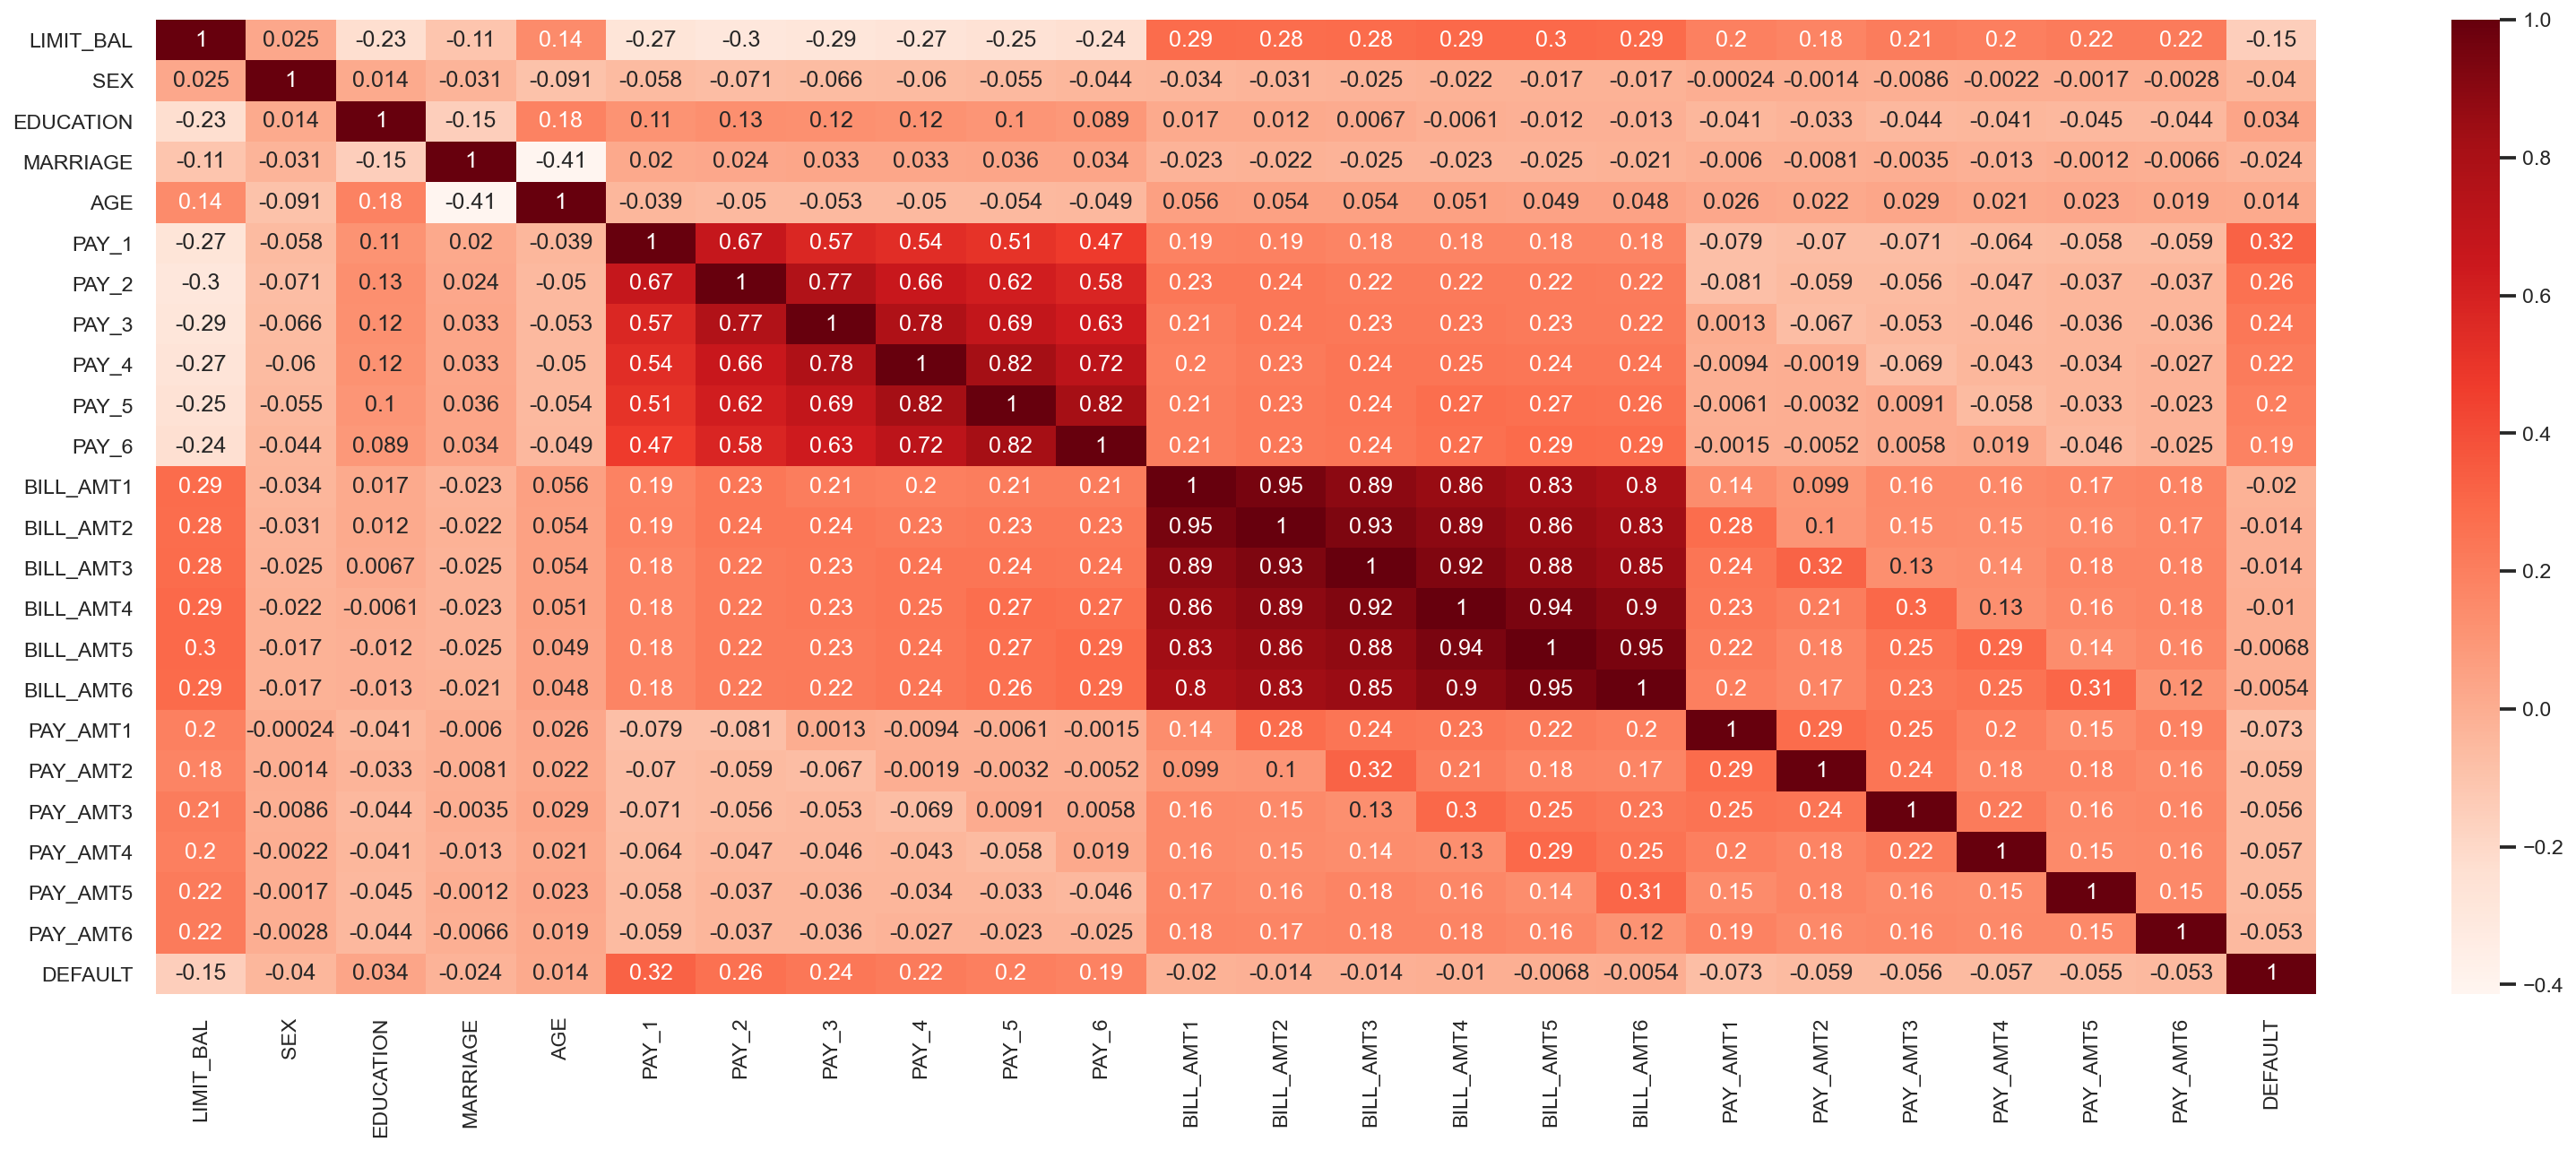

In [55]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,1:].corr(), cmap='Reds', annot=True);

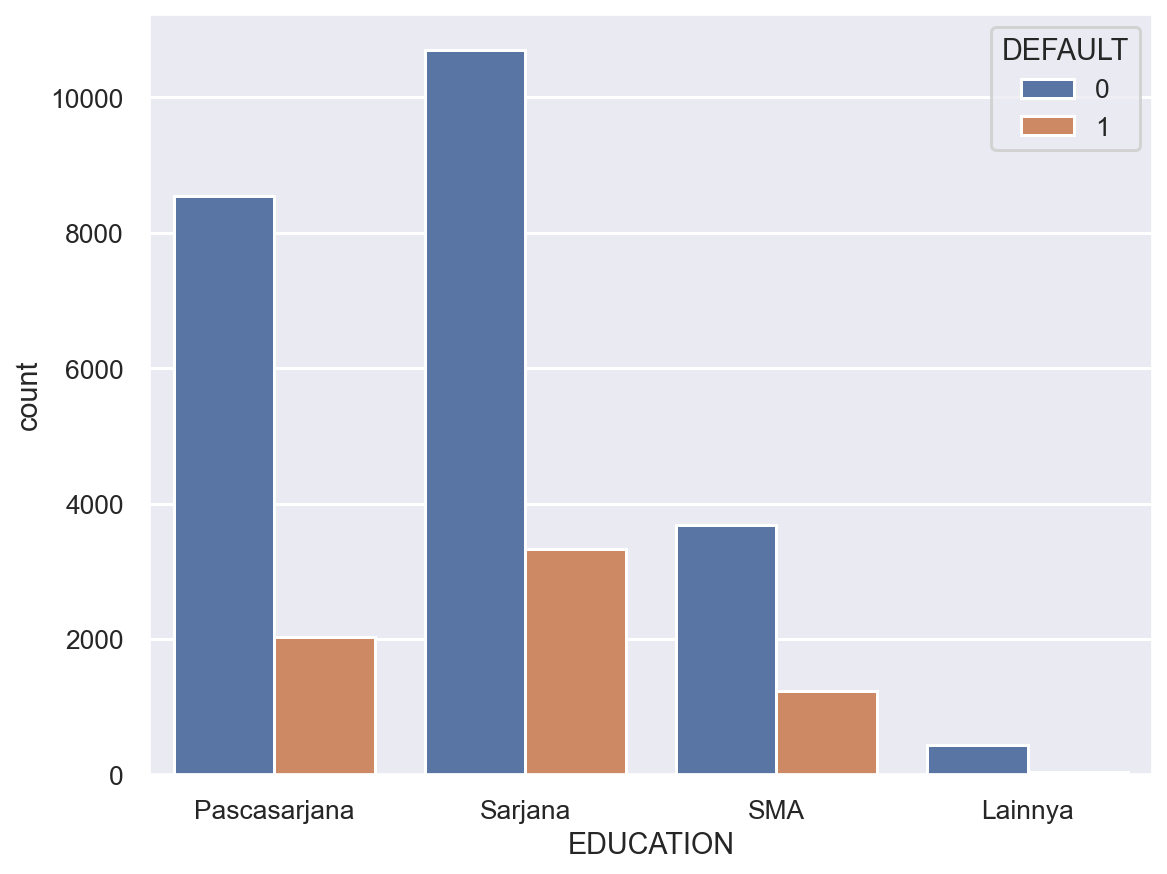

In [57]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Pascasarjana','Sarjana','SMA','Lainnya'])
plt.show()

In [60]:
default0 = df.groupby(df['EDUCATION'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['EDUCATION'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('EDUCATION').size().reset_index(name='TOTAL')
eduTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Pascasarjana','Sarjana','SMA','Lainnya']

eduTable

,EDUCATION,NOT_DEFAULT,DEFAULT,TOTAL
0,Pascasarjana,8549,2036,10585
1,Sarjana,10700,3330,14030
2,SMA,3680,1237,4917
3,Lainnya,435,33,468


In [61]:
eduTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
eduTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

eduPct

,EDUCATION,NOT_DEFAULT(%),DEFAULT(%)
0,Pascasarjana,80.77,19.23
1,Sarjana,76.27,23.73
2,SMA,74.84,25.16
3,Lainnya,92.95,7.05


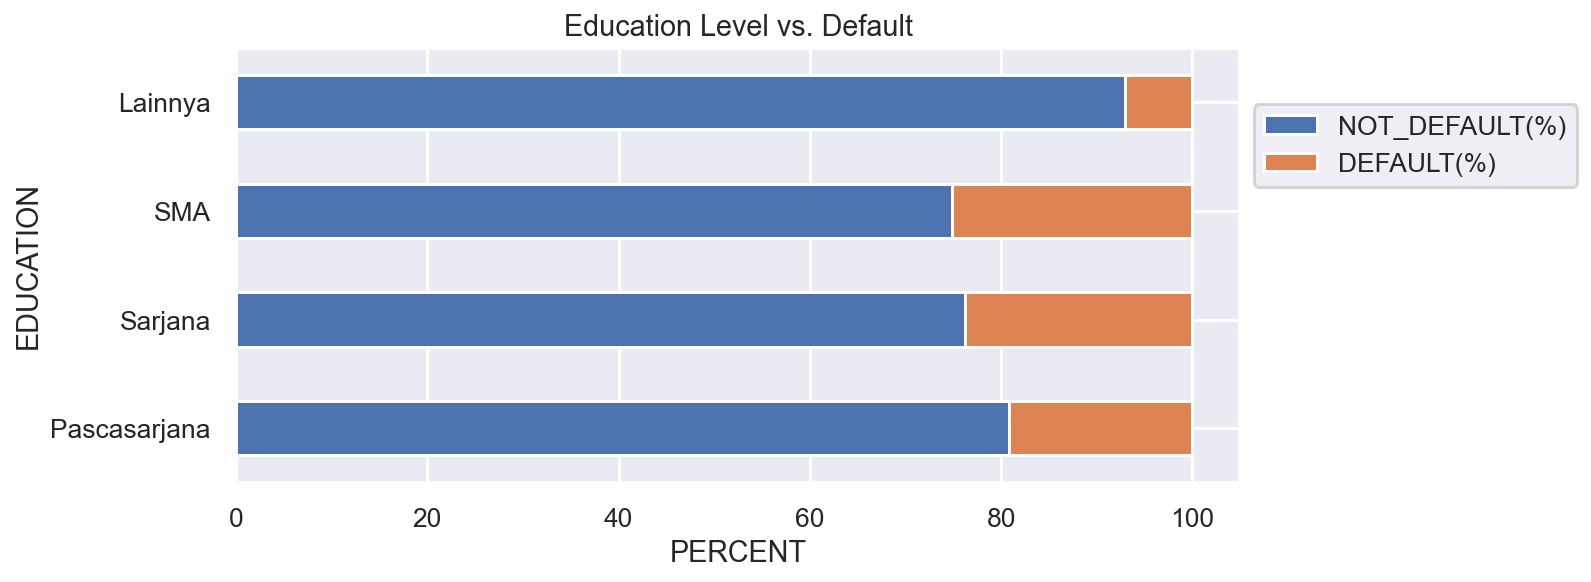

In [62]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = eduPct.plot(x='EDUCATION', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

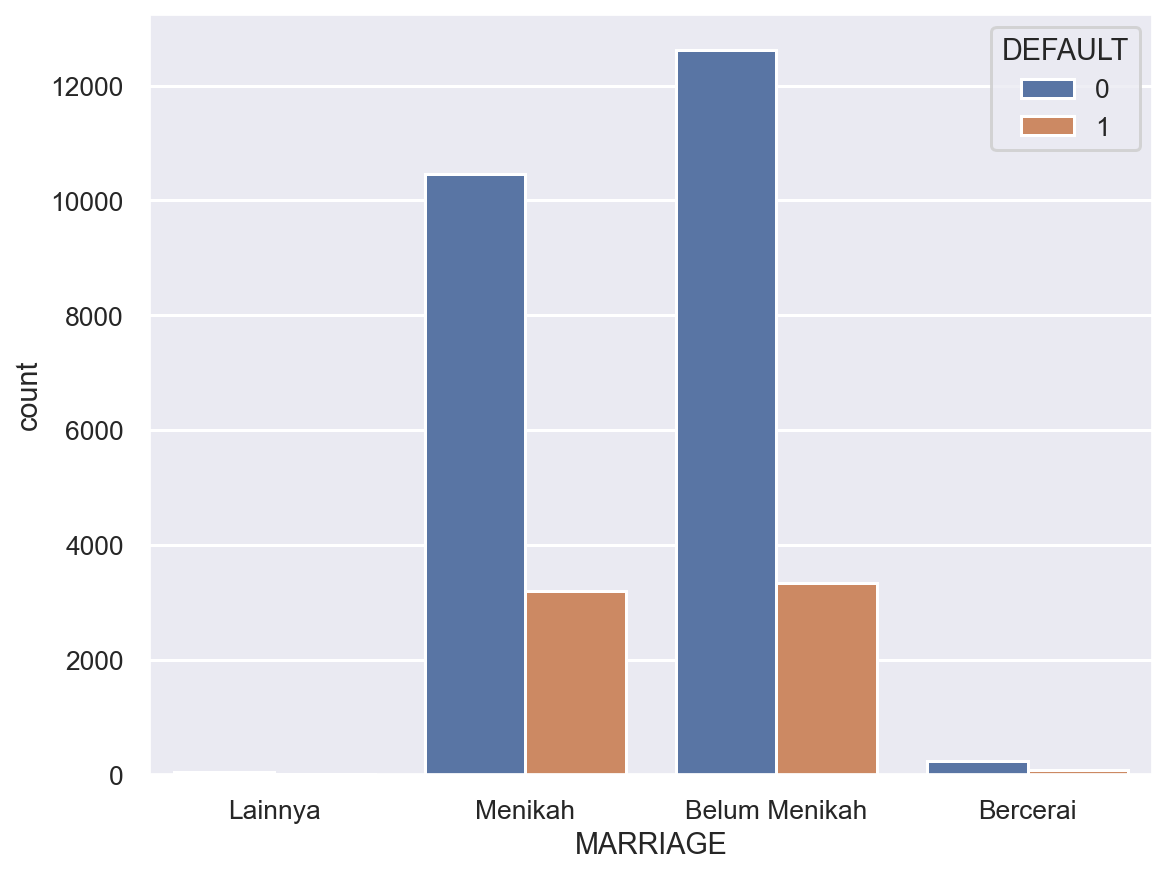

In [65]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

marri = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df )
marri.set_xticklabels(['Lainnya','Menikah','Belum Menikah','Bercerai'])
plt.show()

In [67]:
default0 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Lainnya','Menikah','Belum Menikah','Bercerai']

marriTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Lainnya,49,5,54
1,Menikah,10453,3206,13659
2,Belum Menikah,12623,3341,15964
3,Bercerai,239,84,323


In [68]:
marriTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
marriTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

marriPct = marriTable.iloc[:,0:3]
marriPct = marriPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

marriPct

,MARRIAGE,NOT_DEFAULT(%),DEFAULT(%)
0,Lainnya,90.74,9.26
1,Menikah,76.53,23.47
2,Belum Menikah,79.07,20.93
3,Bercerai,73.99,26.01


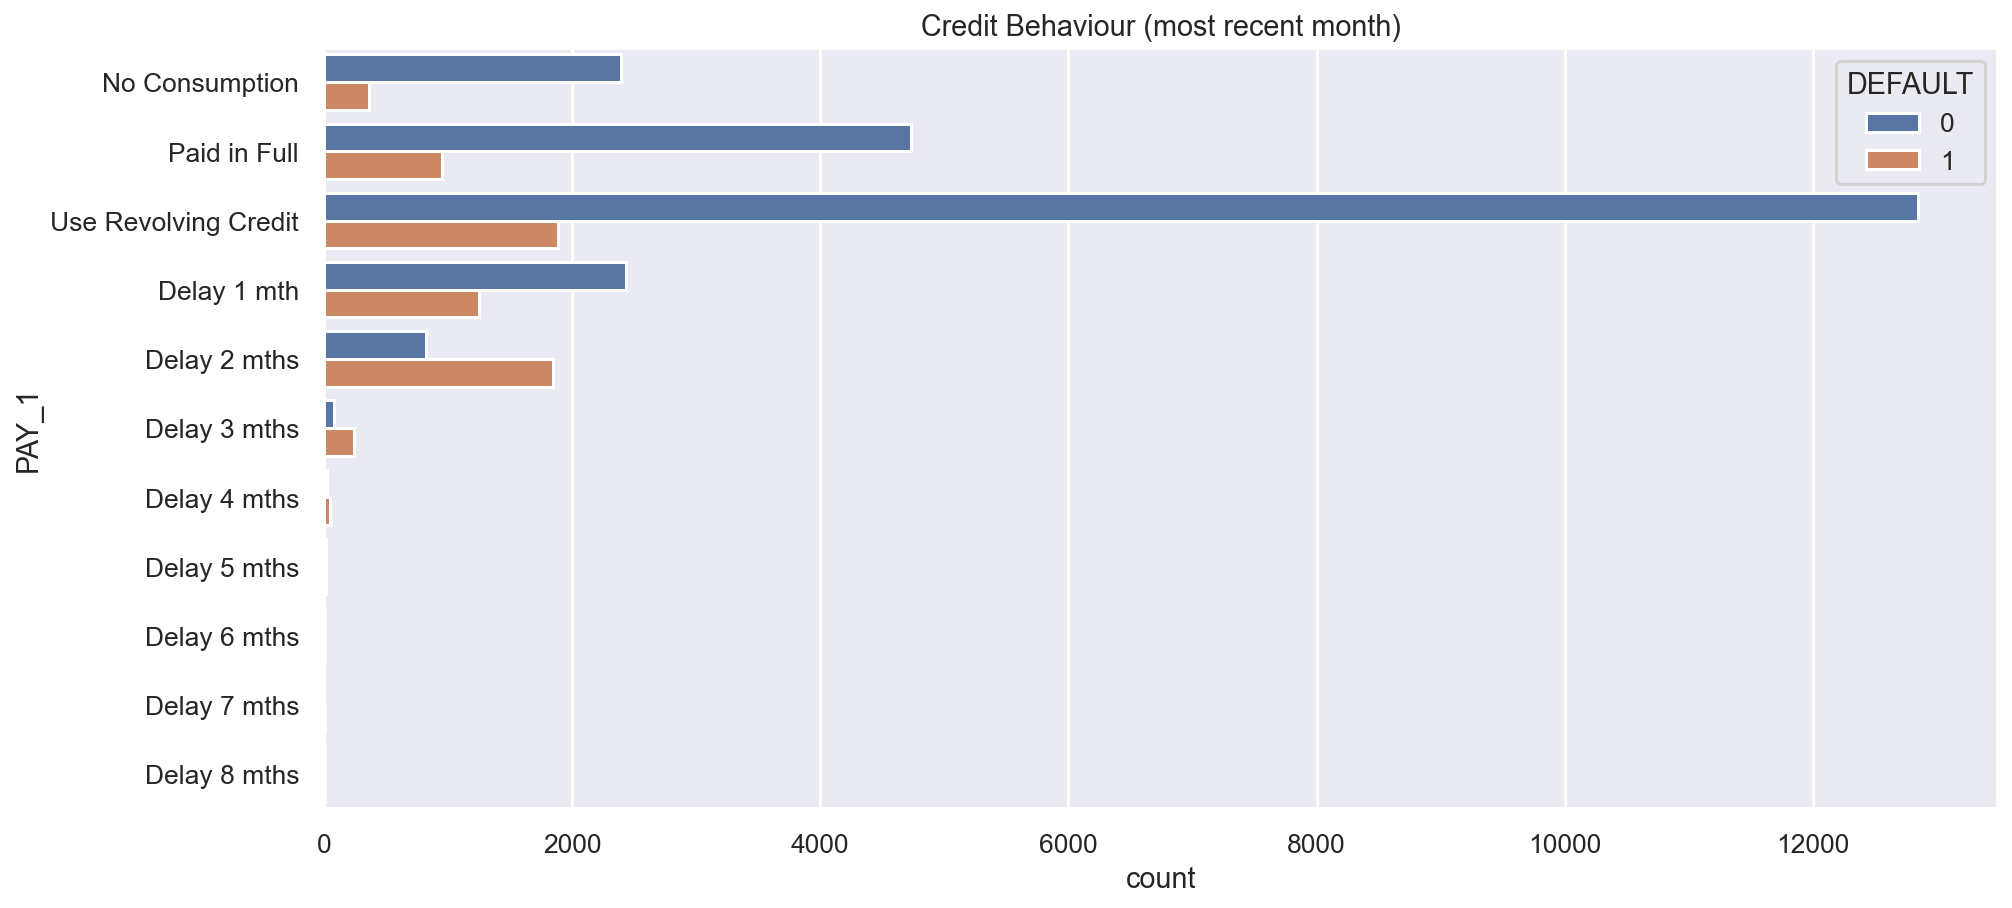

In [71]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

In [72]:
default0 = df.groupby(df['PAY_1'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['PAY_1'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table

,PAY_1,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2394,365,2759
1,Paid in Full,4732,954,5686
2,Use Revolving Credit,12849,1888,14737
3,Delay 1 mth,2436,1252,3688
4,Delay 2 mths,823,1844,2667
5,Delay 3 mths,78,244,322
6,Delay 4 mths,24,52,76
7,Delay 5 mths,13,13,26
8,Delay 6 mths,5,6,11
9,Delay 7 mths,2,7,9


In [73]:
pay1Table['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
pay1Table['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

pay1Pct = pay1Table.iloc[:,0:3]
pay1Pct = pay1Pct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

pay1Pct

,PAY_1,NOT_DEFAULT(%),DEFAULT(%)
0,No Consumption,86.77,13.23
1,Paid in Full,83.22,16.78
2,Use Revolving Credit,87.19,12.81
3,Delay 1 mth,66.05,33.95
4,Delay 2 mths,30.86,69.14
5,Delay 3 mths,24.22,75.78
6,Delay 4 mths,31.58,68.42
7,Delay 5 mths,50.00,50.00
8,Delay 6 mths,45.45,54.55
9,Delay 7 mths,22.22,77.78


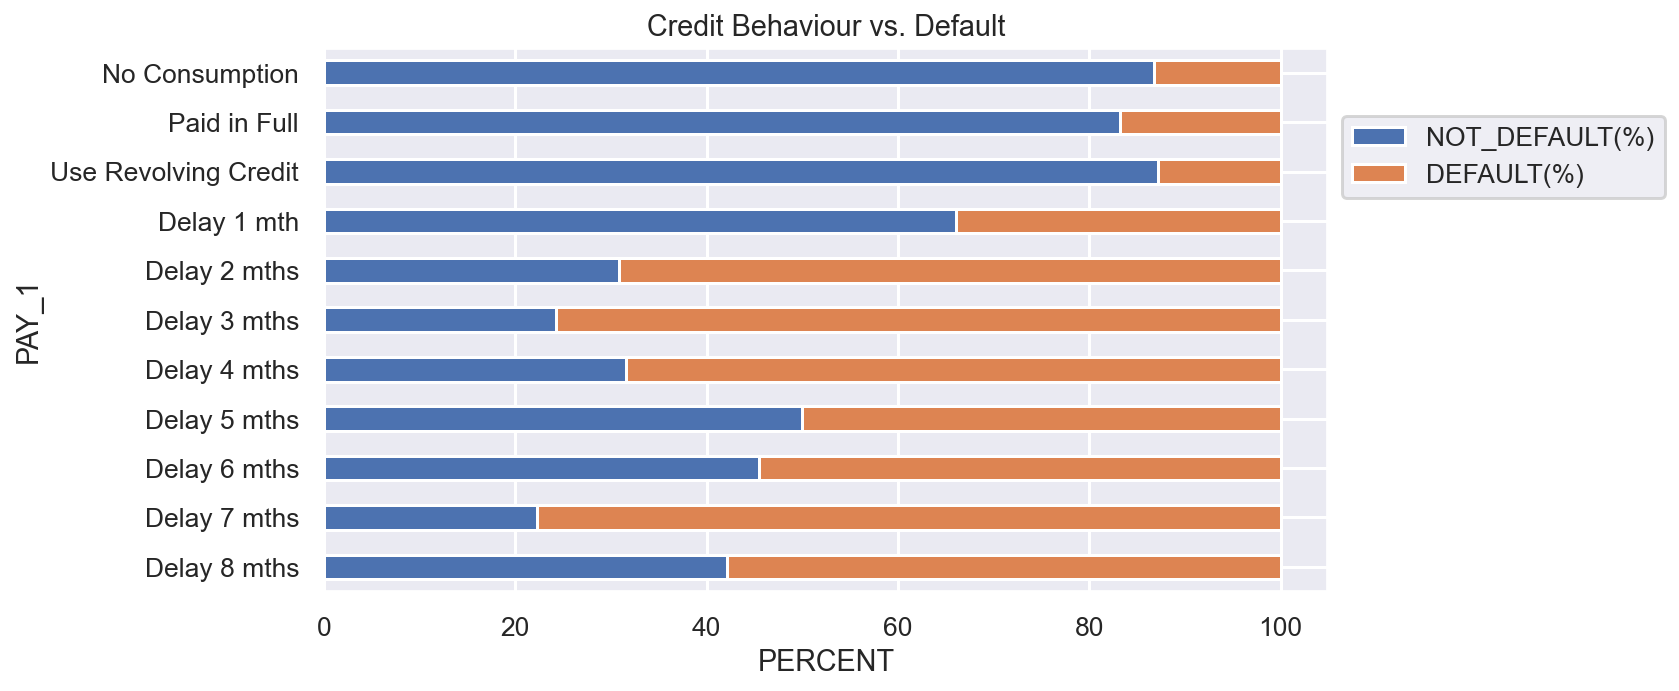

In [74]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_context("talk", font_scale=0.8)

ax = pay1Pct.sort_index(ascending=False).plot(x='PAY_1', kind='barh', stacked=True, title='Credit Behaviour vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

In [78]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

c:\users\ptpn6\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


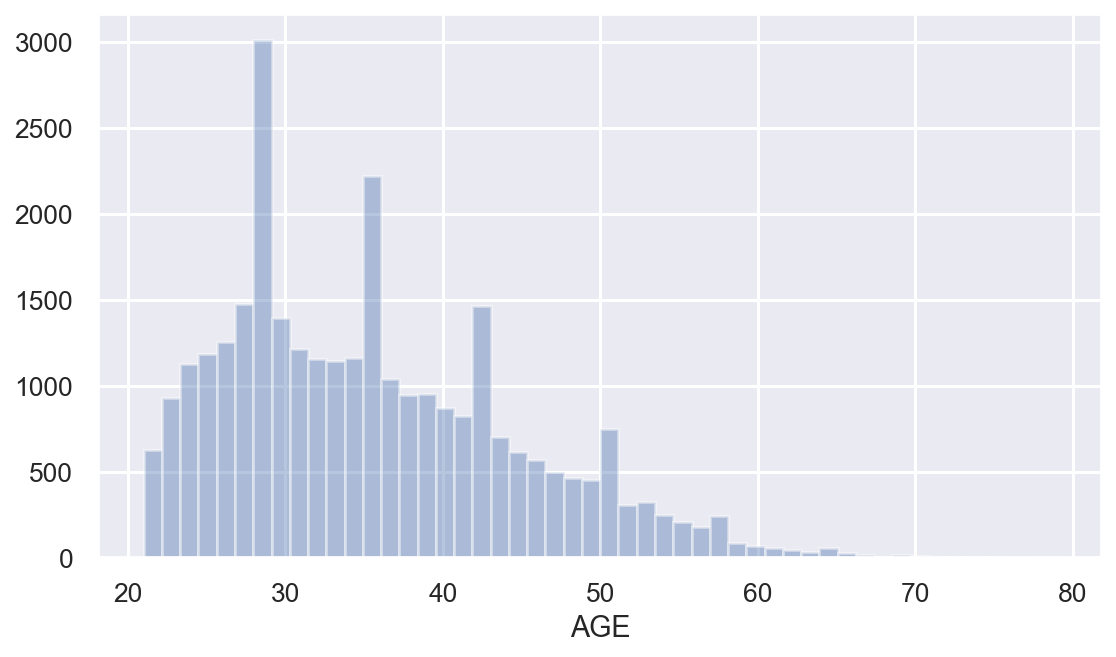

In [79]:
sns.distplot(df['AGE'], norm_hist=False, kde=False);

c:\users\ptpn6\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


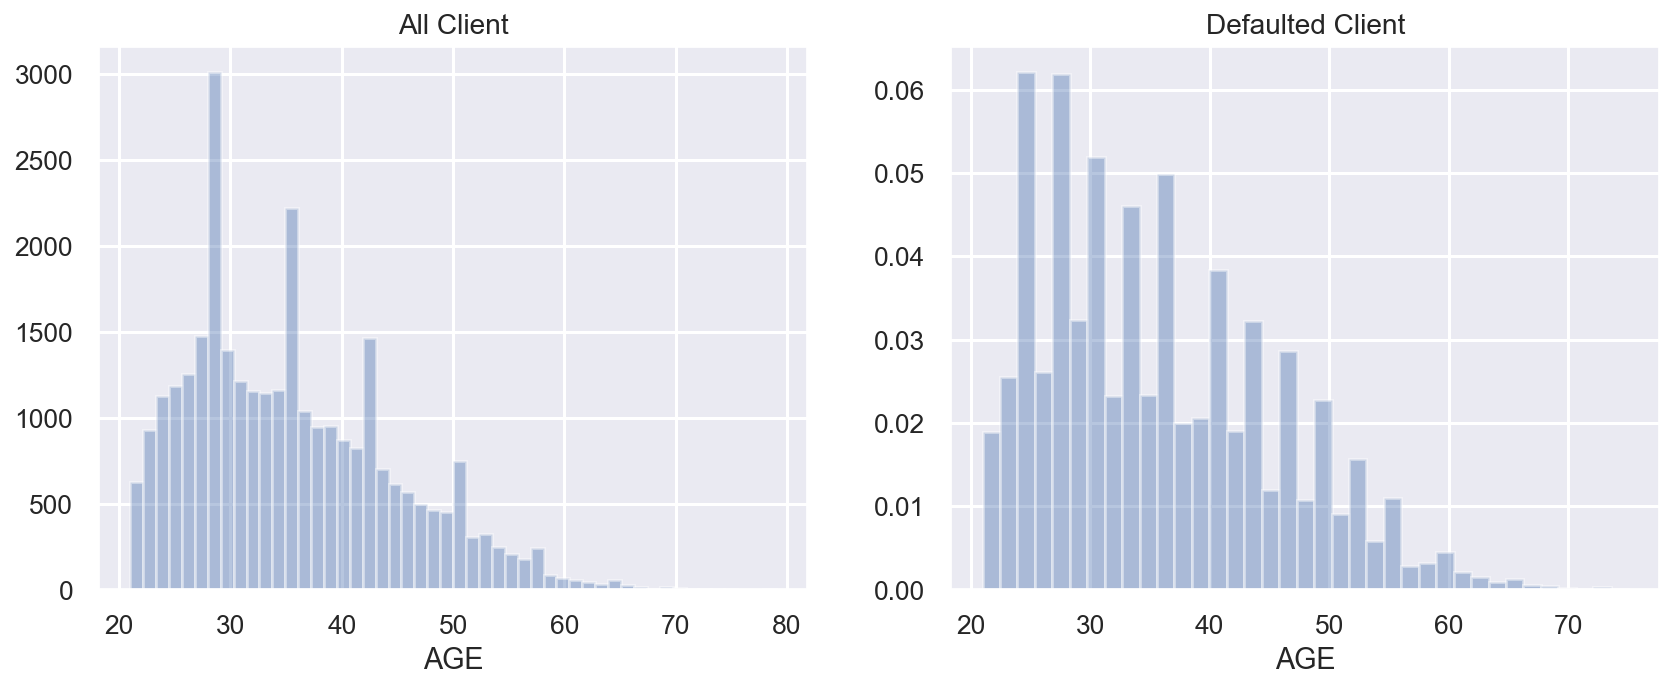

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.set_title('All Client', fontsize=14)
ax2.set_title('Defaulted Client', fontsize=14)

sns.distplot(df['AGE'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['AGE'][df['DEFAULT'] == 1], norm_hist=True, kde=False, ax=ax2);

In [86]:
default0 = df.groupby(df['AGE'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default0 = default0.fillna(0)
default1 = df.groupby(df['AGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
default1 = default1.fillna(0)
total = df.groupby('AGE').size().reset_index(name='TOTAL')

ageTable = total.join(default0.set_index('AGE'),on='AGE').join(default1.set_index('AGE'),on='AGE')
ageTable = ageTable[['AGE', 'NOT_DEFAULT', 'DEFAULT', 'TOTAL']]
ageTable = ageTable.fillna(0)
ageTable

,AGE,NOT_DEFAULT,DEFAULT,TOTAL
0,21,53,14.0,67
1,22,391,169.0,560
2,23,684,247.0,931
3,24,827,300.0,1127
4,25,884,302.0,1186
5,26,1003,253.0,1256
6,27,1164,313.0,1477
7,28,1123,286.0,1409
8,29,1292,313.0,1605
9,30,1121,274.0,1395


In [88]:
ageTable['NOT_DEFAULT'] = round((ageTable['NOT_DEFAULT']/ageTable['TOTAL'])*100,2)
ageTable['DEFAULT'] = round((ageTable['DEFAULT']/ageTable['TOTAL'])*100,2)

agePct = ageTable.iloc[:,0:3]
agePct = agePct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

agePct

,AGE,NOT_DEFAULT(%),DEFAULT(%)
0,21,79.10,20.90
1,22,69.82,30.18
2,23,73.47,26.53
3,24,73.38,26.62
4,25,74.54,25.46
5,26,79.86,20.14
6,27,78.81,21.19
7,28,79.70,20.30
8,29,80.50,19.50
9,30,80.36,19.64


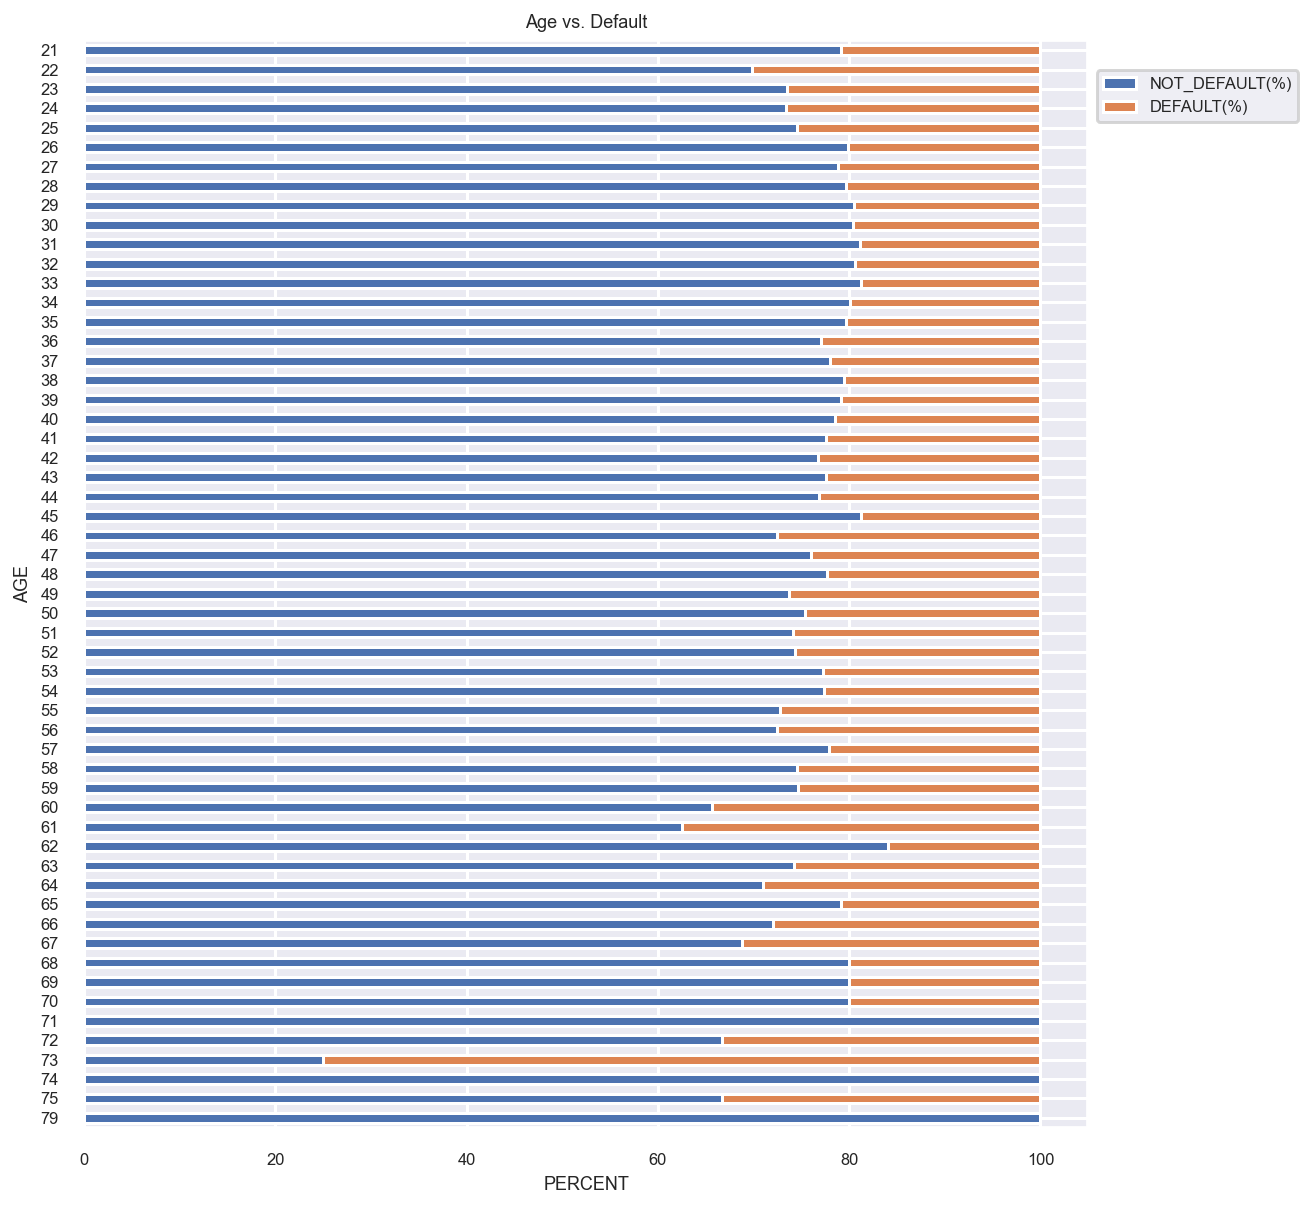

In [89]:
sns.set(rc={'figure.figsize':(9,10)})
sns.set_context("talk", font_scale=0.5)

ax = agePct.sort_index(ascending=False).plot(x='AGE', kind='barh', stacked=True, title='Age vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.98))
plt.show()

In [81]:
X = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE'
        ,'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'
        ,'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y = df['DEFAULT']

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
from sklearn.metrics import accuracy_score

logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.784

In [91]:
X = df[['SEX','EDUCATION','MARRIAGE','AGE']]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.7842222222222223

In [92]:
X = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.8142222222222222

In [93]:
X = df[['PAY_1']]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.8265555555555556